In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count.

len(cities)

589

In [5]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")


# Create counters.

record_count = 1

set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                            "Cloudiness": city_clouds,
                          
                            "Country": city_country,
                          
                            "Date": city_date,
                          
                            "Humidity": city_humidity,
                          
                            "Lat": city_lat,
                          
                            "Lng": city_lng,
                          
                            "Max Temp": city_max_temp,
                          
                            "Wind Speed": city_wind,})

# If an error is experienced, skip the city.
    
    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | beloha
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hinundayan
Processing Record 10 of Set 1 | wahiawa
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | port hedland
Processing Record 19 of Set 1 | zhigansk
Processing Record 20 of Set 1 | praia da vitoria
Processing Record 21 of Set 1 | krasnoyarsk-66
City not found. Skipping...
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | broome
Processing Record 24 of S

Processing Record 39 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 4 | mehran
Processing Record 41 of Set 4 | qaanaaq
Processing Record 42 of Set 4 | plettenberg bay
Processing Record 43 of Set 4 | bilibino
Processing Record 44 of Set 4 | nabire
Processing Record 45 of Set 4 | uddevalla
Processing Record 46 of Set 4 | auki
Processing Record 47 of Set 4 | ornes
Processing Record 48 of Set 4 | rizhao
Processing Record 49 of Set 4 | khatanga
Processing Record 50 of Set 4 | yangshe
Processing Record 1 of Set 5 | tumarbong
Processing Record 2 of Set 5 | akyab
Processing Record 3 of Set 5 | grand gaube
Processing Record 4 of Set 5 | hanko
Processing Record 5 of Set 5 | muscat
Processing Record 6 of Set 5 | lebedinyy
Processing Record 7 of Set 5 | morehead
Processing Record 8 of Set 5 | huanren
Processing Record 9 of Set 5 | scarborough
Processing Record 10 of Set 5 | machico
Processing Record 11 of Set 5 | glazov
Processing Record 12 of Set 5 | vao
Processing R

Processing Record 28 of Set 8 | sur
Processing Record 29 of Set 8 | san cristobal
Processing Record 30 of Set 8 | bac lieu
Processing Record 31 of Set 8 | husavik
Processing Record 32 of Set 8 | bamako
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | tilichiki
Processing Record 35 of Set 8 | okha
Processing Record 36 of Set 8 | young
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | homer
Processing Record 39 of Set 8 | eyl
Processing Record 40 of Set 8 | tadine
Processing Record 41 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 8 | sao felix do xingu
Processing Record 43 of Set 8 | puro
Processing Record 44 of Set 8 | karaul
City not found. Skipping...
Processing Record 45 of Set 8 | viligili
City not found. Skipping...
Processing Record 46 of Set 8 | naftah
City not found. Skipping...
Processing Record 47 of Set 8 | palmer
Processing Record 48 of Set 8 | itarema
Processing Record 49 of Set 8 | azimur
City n

Processing Record 13 of Set 12 | mehamn
Processing Record 14 of Set 12 | alugan
Processing Record 15 of Set 12 | portland
Processing Record 16 of Set 12 | luganville
Processing Record 17 of Set 12 | sinnamary
Processing Record 18 of Set 12 | kiruna
Processing Record 19 of Set 12 | pisco
Processing Record 20 of Set 12 | jizan
Processing Record 21 of Set 12 | monrovia
Processing Record 22 of Set 12 | escanaba
Processing Record 23 of Set 12 | arman
Processing Record 24 of Set 12 | vanimo
Processing Record 25 of Set 12 | abu zabad
Processing Record 26 of Set 12 | myaundzha
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | christchurch
Processing Record 29 of Set 12 | kopayhorod
Processing Record 30 of Set 12 | usinsk
Processing Record 31 of Set 12 | qaqortoq
Processing Record 32 of Set 12 | maceio
Processing Record 33 of Set 12 | harper
Processing Record 34 of Set 12 | joao pinheiro
Processing Record 35 of Set 12 | candawaga
City not found. Skipping...
Processing Rec

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,20,CL,2022-08-08 03:39:38,87,-53.1500,-70.9167,35.71,12.66
1,Bredasdorp,100,ZA,2022-08-08 03:44:36,88,-34.5322,20.0403,57.29,2.98
2,Butaritari,92,KI,2022-08-08 03:44:36,75,3.0707,172.7902,81.70,12.15
3,Chuy,6,UY,2022-08-08 03:44:37,88,-33.6971,-53.4616,47.16,7.23
4,Hilo,40,US,2022-08-08 03:44:37,77,19.7297,-155.0900,84.27,5.75
5,Beloha,11,MG,2022-08-08 03:44:37,93,-25.1667,45.0500,61.90,7.99
6,Hobart,20,AU,2022-08-08 03:40:38,69,-42.8794,147.3294,54.27,8.05
7,Rikitea,100,PF,2022-08-08 03:44:38,77,-23.1203,-134.9692,70.32,36.93
8,Hinundayan,81,PH,2022-08-08 03:44:38,70,10.3523,125.2506,84.33,5.84
9,Wahiawa,0,US,2022-08-08 03:44:38,62,21.5028,-158.0236,82.15,11.50


In [11]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.

import time

# Get today's date in seconds.

today = time.time()

today

1659931119.9250617

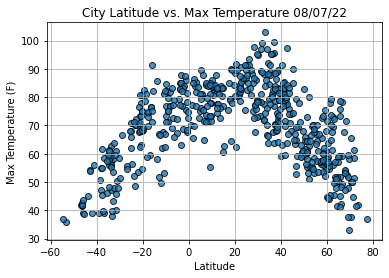

In [14]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

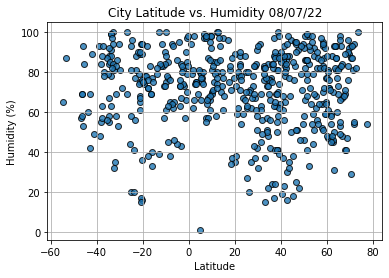

In [15]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

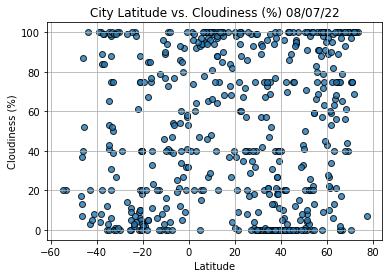

In [16]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

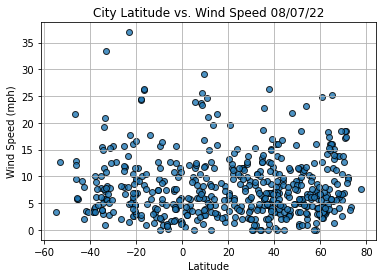

In [17]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            
            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [18]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    
    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [19]:
index13 = city_data_df.loc[13]

index13

City              Arraial Do Cabo
Cloudiness                     98
Country                        BR
Date          2022-08-08 03:44:40
Humidity                       88
Lat                      -22.9661
Lng                      -42.0278
Max Temp                    70.12
Wind Speed                   4.88
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
529    False
530     True
531     True
532     True
533     True
Name: Lat, Length: 534, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Butaritari,92,KI,2022-08-08 03:44:36,75,3.0707,172.7902,81.70,12.15
4,Hilo,40,US,2022-08-08 03:44:37,77,19.7297,-155.0900,84.27,5.75
8,Hinundayan,81,PH,2022-08-08 03:44:38,70,10.3523,125.2506,84.33,5.84
9,Wahiawa,0,US,2022-08-08 03:44:38,62,21.5028,-158.0236,82.15,11.50
10,Jamestown,0,US,2022-08-08 03:44:39,65,42.0970,-79.2353,78.39,8.05


In [22]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

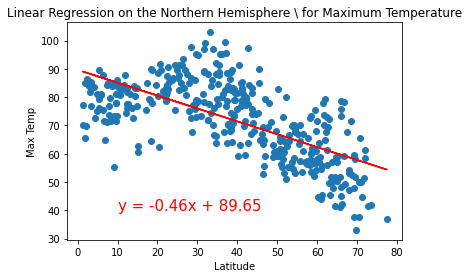

In [23]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

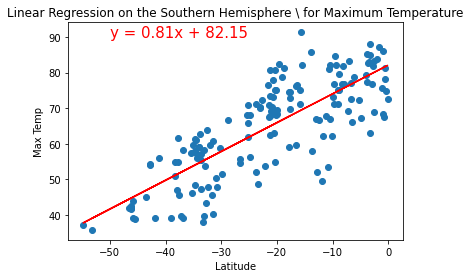

In [24]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

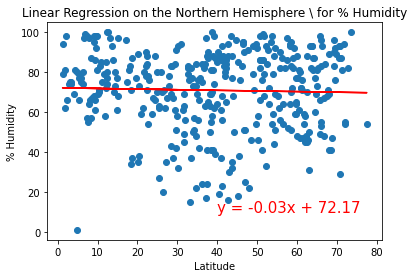

In [25]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

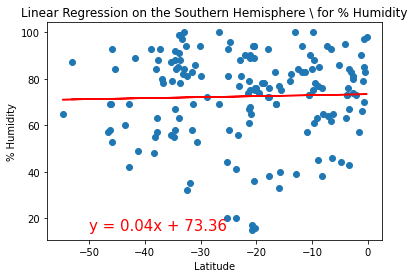

In [26]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

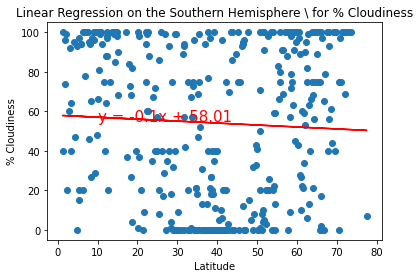

In [27]:
# Linear regression on the Southern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(10,55))

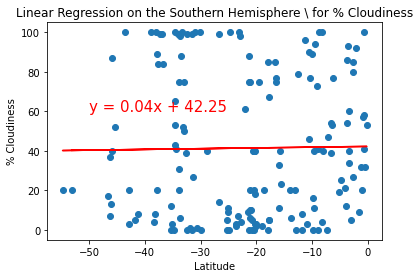

In [28]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

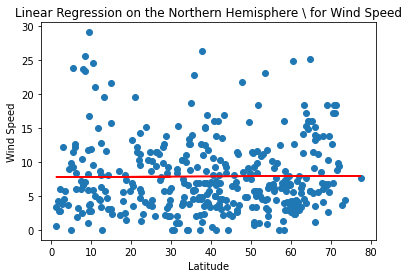

In [29]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(40,35))

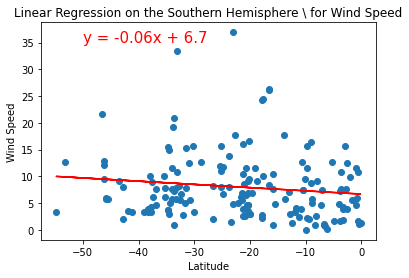

In [30]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-50,35))